# Анализ и сегментация клиентов «Метанпромбанка» по потреблению

**Заказчик:** отдел маркетинга «Метанпромбанка».\
\
**Цель работы:** остановить отток клиентов банка.\
\
**Ретроспектива:** ранее было проведено исследование оттока, составлены дэшборды и выделены сегменты, но клиентская база поменялась и текущие решения не работают.\
\
**Описание данных:** датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.\
\
**Задачи:**

1) Изучение данных.
- загрузка датасета;
- изучение общей информации о данных.

2) Подготовка данных.
- замена названий столбцов на удобные для работы;
- проверка пропусков и выявление их природы; 
- проверка типов данных;
- выявление и устранение дубликатов;
- кодирование категориальных признаков и добавление соответствующих столбцов.

3) Исследовательский анализ данных.
- изучение распределения признаков клиентов, доля отточных клиентов среди клиентов с каждым признаком, определение потенциально отточных клиентов и лояльных клиентов;
- выявление портретов типичных клиентов банка с помощью средней и медианы, визуализация результатов;
- корреляционный анализ с целью выявления зависимости между каждым признаком и оттоком, построение тепловой карты.

4) Постановка и проверка статистических гипотез.

- формулировка гипотез:\
a) возрасты клиентов, которые пользуются двумя продуктами банка, и клиентов, которые пользуются одним продуктом, равны.\
b) выдвинуть гипотезы о равенстве среднего значения какого-то признака для отточных и неотточных клиентов / проверить статистическую значимость различия долей отточных клиентов среди клиентов с a признаком и клиентов с b признаком.\

- проверка данных на нормальность с помощью критерия Шапиро-Уилка: если нормальное - использовать параметрические методы, в случае отличного от нормального распределения следует использовать непараметрические методы. 
- выбор и обоснование статтеста;
- проверка и интерпретация результата.

5) Составление промежуточных итогов для сегментации клиентов - выявление признаков потребления наиболее отточных клиентов.

6) Сегментация клиентов на основе выделенных показателей.
- формирование групп по 300-1000 клиентов наиболее склонных к оттоку:\
a) условия выделения сегмента;\
b) определениие размера сегмента и приведение описательных характеристик клиентов;\
c) расчет доли оттока.

7) Составить общий вывод и рекомендации, подготовить презентацию.

In [1]:
import pandas as pd
import datetime
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from scipy import stats as st
import scipy.stats as stats
import math as mth
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot

## Изучение данных

### Зарузка данных

In [3]:
data = pd.read_csv('/datasets/bank_scrooge.csv')

### Общая характеристика данных

In [4]:
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


**Колонки:**

USERID — идентификатор пользователя,\
score — баллы кредитного скоринга,\
city — город,\
gender — пол,\
age — возраст,\
equity — количество баллов собственности,\
balance — баланс на счёте,\
products — количество продуктов, которыми пользуется клиент,\
credit_card — есть ли кредитная карта,\
last_activity — активный клиент,\
EST_SALARY — оценочный доход клиента,\
сhurn — признак оттока.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Характеристика данных:**

1) Признаки и типы данных:
- в датасете имеется 12 колонок-признаков клиента;
- к дискретным признакам строкового типа относятся данные столбца: city (город), gender (пол).
- к дискретным признакам целого типа относятся данные столбца: USERID (идентификатор), credit_card (наличие кредитной карты), last_activity (активность клиент), churn (признак оттока).
- к непрерывным признакам вещественного типа относятся данные столбца: score (баллы кредитного скоринга), age (возраст), balance (баланс на счете), EST_SALARY (оценочный доход);
- к непрерывным признакам целого типа относятся данные столбца: equity (количество баллов собственности), products (количество продуктов).

2) В столбцах age и balance имеются пропуски.

3) Названия столбцов EST_SALARY и USERID имеют неудобный вид.

4) Всего в датасете 10 000 строк.

## Подготовка данных

### Замена названий столбцов

In [6]:
data = data.rename(
    columns = {
        'EST_SALARY': 'est_salary', 
        'USERID': 'user_id'
    }
)

In [7]:
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


### Проверка пропусков

**Количество пропущенных значений:**

In [8]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

**Процент пропущенных значений:**

In [9]:
(data.isna().sum() / len(data))*100

user_id           0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

**Природа пропусков в столбце age:**

In [10]:
data.query('age.isnull()').head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


В cтолбце age всего 0.26% пропусков. В записях, где отсутствуют данные age нет какой-то видимой закономерности - вероятно пользователи просто не предоставили эту информацию.

Поскольку пропуски в данном столбце незначительны - мы от них избавимся. Это позволит нам позже привести содержимое столбца age к целому типу.

**Природа пропусков в столбце age:**

In [11]:
data = data.dropna(subset=['age'])

In [12]:
data = data.reset_index(drop = True)

**Природа пропусков в столбце balance:**

In [13]:
data.query('balance.isnull()')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9950,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9958,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9967,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9970,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


Здесь явно очень много нулевых значений в столбце eqity. Посчитаем, такие строки где нет данных по balance и нулевое значение столбца equity:

In [14]:
data.query('balance.isnull() & equity == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9950,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9958,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9967,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9970,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


2164 записи из 2279 имеют нулевое значение в столбце equity. Посчитаем долю этих записей во всем датафрейме с 0 в столбце equity:

In [15]:
print(
f"Доля клиентов с 0 баллов собственности и без даннных по балансу: {100*round(len(data.query('balance.isnull() & equity == 0'))/len(data.query('equity == 0')), 2)} %")

Доля клиентов с 0 баллов собственности и без даннных по балансу: 84.0 %


Если мы удалим строки с пропусками в balance мы удалим **84% строк** со значением 0 в столбце equity. Таким образом, целесообразно оставить пропуски, как есть, а для исследовательского анализа баланса будем использовать данные, где нет пропусков.

In [16]:
#CODE REVIEW
data["balance_isnull"] = data["balance"].isna()

data.pivot_table(index="equity", columns="products", values="balance_isnull", aggfunc="mean", fill_value='')

products,0,1,2,3,4,5
equity,,,,,,
0,,0.937213,0.550274,0.465517,0.0,
1,,0.384314,0.032407,0.028169,0.0,0.0
2,,0.000000,0.000000,0.000000,0.0,0.0
3,1.0,0.000000,0.000000,0.000000,0.0,0.0
4,,0.000000,0.000000,0.000000,0.0,0.0
5,,0.000000,0.000000,0.000000,0.0,0.0
6,,0.000000,0.000000,0.000000,0.0,
7,,0.000000,0.000000,0.000000,0.0,
8,,0.000000,0.000000,0.000000,0.0,


### Проверка типов данных

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9974 non-null   int64  
 1   score           9974 non-null   float64
 2   city            9974 non-null   object 
 3   gender          9974 non-null   object 
 4   age             9974 non-null   float64
 5   equity          9974 non-null   int64  
 6   balance         7695 non-null   float64
 7   products        9974 non-null   int64  
 8   credit_card     9974 non-null   int64  
 9   last_activity   9974 non-null   int64  
 10  est_salary      9974 non-null   float64
 11  churn           9974 non-null   int64  
 12  balance_isnull  9974 non-null   bool   
dtypes: bool(1), float64(4), int64(6), object(2)
memory usage: 944.9+ KB


Столбец с возрастом (age) имеет вещественный тип данных. Для удобства приведем его к целому типу.

In [18]:
data['age'] = data['age'].astype('int')

### Выявление и устранение дубликатов

**Проверка полных дубликатов:**

In [19]:
data.duplicated().value_counts()

False    9974
dtype: int64

Полных дубликатов в датафрейме **не найдено.**

**Проверка неполных дубликатов:**

In [20]:
data[['user_id']].duplicated().value_counts()

False    9924
True       50
dtype: int64

Найдено 50 пар записей с одинаковым user_id.

In [21]:
data[['user_id', 'gender', 'age']].duplicated().value_counts()

False    9972
True        2
dtype: int64

Найдено 2 пары записей с одинаковым user_id, gender и age.

Далее выведем записи с дублирующимся user_id:

In [22]:
duplicate_id_rows = data[data.duplicated(['user_id'])]
duplicated_id = duplicate_id_rows['user_id'].to_list()
data.query('user_id in @duplicated_id').sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isnull
1892,116540,883.0,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,False
7683,116540,887.0,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,True
4862,117943,855.0,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,False
7531,117943,880.0,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,True
5856,120258,908.0,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,220816,934.0,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0,False
2594,226719,990.0,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1,False
4212,226719,903.0,Рыбинск,Ж,63,0,NaN,1,1,0,138582.58,0,True
8192,227795,840.0,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1,False


Как мы видим, записи с повторяющимися user_id могут относиться к разным людям, так как у них отичаются возраст, пол и город. Вероятно, банк присваивает членам одной семьи единый user_id. Поэтому, у нас нет оснований удалять записи только по одинаковому user_id.

Теперь посмотрим на записи, где совпадают 3 признака - user_id, age, gender:

In [23]:
duplicate_id_age_gender_rows = data[data.duplicated(['user_id', 'age', 'gender'])]
duplicated_id_gender_age = duplicate_id_age_gender_rows['user_id'].to_list()
data.query('user_id in @duplicated_id_gender_age').sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isnull
3270,155765,863.0,Ярославль,М,30,5,1036114.50,5,1,1,150744.50,1,False
5192,155765,923.0,Рыбинск,М,30,0,NaN,1,1,1,120296.60,0,True
8192,227795,840.0,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1,False
8481,227795,839.0,Ярославль,М,34,2,326593.14,2,1,0,103314.92,0,False


Найдено всего 2 пары дубликатов, когда совпадают 3 признака: user_id, age, gender. Вполне возможно, что один и тот же клиент может пользоваться услугами разных региональных отделений банка.

**Таким образом, нет оснований полагать что найденные дубликаты на самом деле являются таковыми, поскольку один и тот же клиент может пользоваться услугами банка в разных городах, а люди из одной семьи могут иметь одинаковый user_id в банке. Поэтому удалять такие дубликаты не представляется целесообразным.**

### Кодирование категориальных признаков и добавление соответствующих столбцов

Как мы выяснили, к дискретным признакам строкового типа относятся данные столбца: city (город), gender (пол).

Для того, чтобы эти данные использовать в исследовательском анализе, воспользуемся двоичным кодированием.

In [24]:
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isnull
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,False
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,False
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,True
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,False
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,False
9970,139170,894.0,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,True
9971,115639,903.0,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,True
9972,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,False


**Добавим столбец is_female, где 1 будет означать женский пол:**

In [25]:
def gender_f (row):
    if row == 'Ж':
        return(1)
    else:
        return(0)
    
def gender_m (row):
    if row == 'М':
        return(1)
    else:
        return(0)

In [26]:
data['is_female'] = data['gender'].apply(gender_f)
data['is_male'] = data['gender'].apply(gender_m)

**Теперь кодируем данные столбца city.** Создадим дополнительные столбцы, в каждом из которых единица будет присвоена городу из названия столбца, а нуль - всем остальным городам.

Определим, сколько городов представлено в датафрейме:

In [27]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [28]:
def town (row):
    if row == city:
        return(1)
    else:
        return(0)

In [29]:
city = 'Рыбинск'
data['is_rybinsk'] = data['city'].apply(town)

city = 'Ярославль'
data['is_yaroslavl'] = data['city'].apply(town)

city = 'Ростов'
data['is_rostov'] = data['city'].apply(town)

Теперь проверим добавленные столбцы:

In [30]:
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isnull,is_female,is_male,is_rybinsk,is_yaroslavl,is_rostov
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,False,1,0,1,0,0
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,False,1,0,1,0,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,True,1,0,1,0,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,False,1,0,0,1,0
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,False,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,False,0,1,1,0,0
9970,139170,894.0,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,True,0,1,0,1,0
9971,115639,903.0,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,True,0,1,0,1,0
9972,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,False,1,0,0,1,0


Кодирование категориальных признаков завершено - можно приступапать к исследовательскому анализу.

## Исследовательский анализ данных

### Изучение распределения признаков клиентов

#### Распределение категориальных признаков

##### Распределение клиентов по полу (gender)

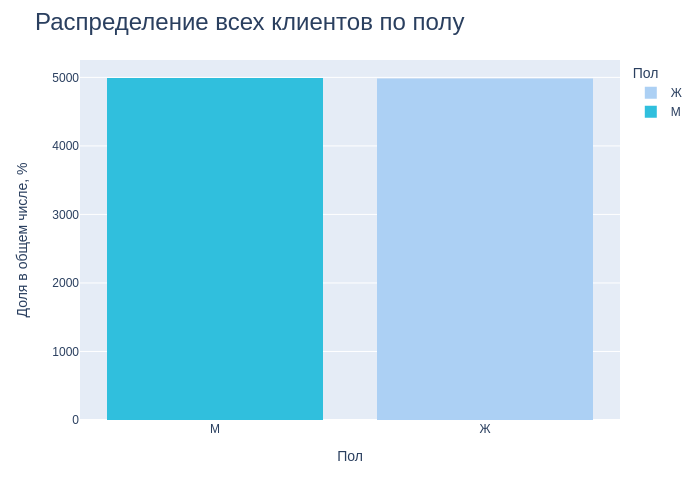

In [31]:
fig = px.histogram(data, x='gender', color="gender", color_discrete_sequence=['#ACD0F4', '#30BFDD'])

fig.update_layout(
    title='Распределение всех клиентов по полу',
    title_font_size=24,
    xaxis_title = 'Пол',
    yaxis_title = 'Доля в общем числе, %',
    legend_title = 'Пол'
).update_xaxes(categoryorder="total descending")

fig.show('png')

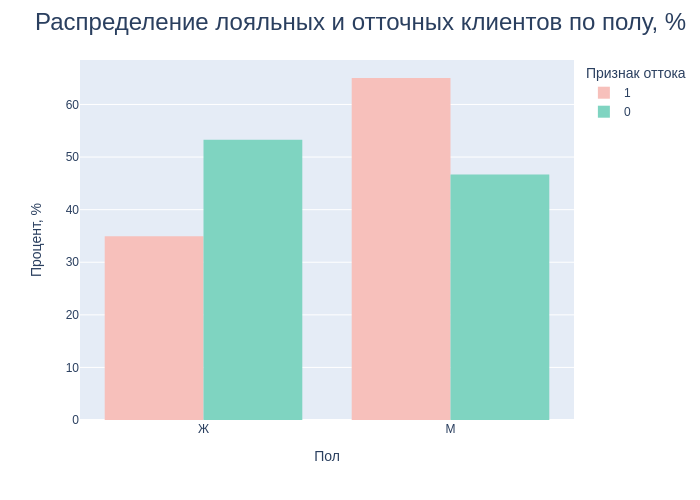

In [32]:
fig = px.histogram(
    data, x='gender', 
    color="churn", 
    barmode='group', 
    histnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение лояльных и отточных клиентов по полу, %', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Пол',
    yaxis_title = 'Процент, %')

fig.show('png')

**Отточные и лояльные клиенты среди клиентов-женщин и клиентов-мужчин:**

In [33]:
data.groupby(['gender', 'churn']).agg({'city': 'count'}).reset_index().rename(
        columns = {'city': 'count_by_churn'})

,gender,churn,count_by_churn
0,Ж,0,4347
1,Ж,1,636
2,М,0,3808
3,М,1,1183


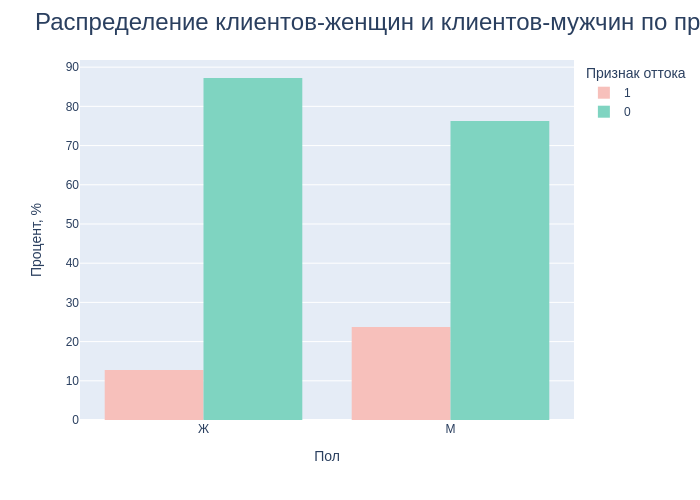

In [92]:
fig = px.histogram(
    data, x='gender', 
    color="churn", 
    barmode='group', 
    barnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение клиентов-женщин и клиентов-мужчин по признаку оттока, %', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Пол',
    yaxis_title = 'Процент, %')

fig.show('png')

- В датафрейме представлены данные по клиентам, из которых **50% мужчин (4991 человек) и 50% женщин (4983 человек).**
- 65% отточных клиентов - мужчины. 53% лояльных клиентов - женщины.
- **12% клиентов-женщин - отточные клиенты, в то время как доля оттчных клиентов среди клиентов-мужчин - 24%. Доля отточных клиентов-мужчин в 2 раза выше, чем данный показатель у клиентов-женщин.**

##### Распределение клиентов по городам (city)

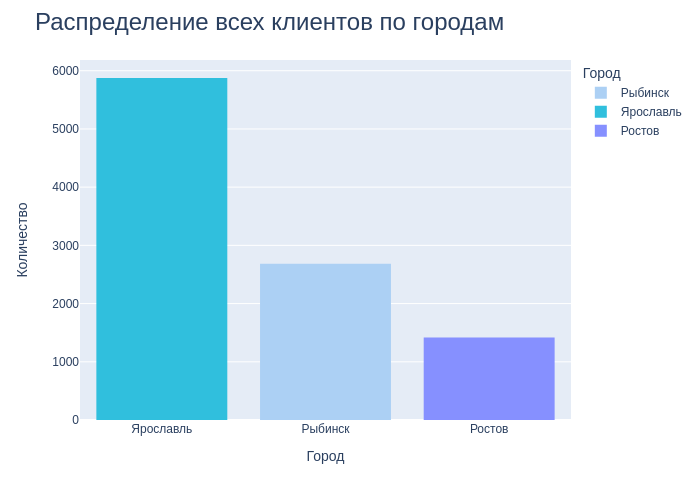

In [93]:
fig = px.histogram(data, x='city', color="city", color_discrete_sequence=['#ACD0F4', '#30BFDD', '#8690FF'])

fig.update_layout(
    title='Распределение всех клиентов по городам',
    title_font_size=24,
    xaxis_title = 'Город',
    yaxis_title = 'Количество',
    legend_title = 'Город'
).update_xaxes(categoryorder="total descending")

fig.show('png')

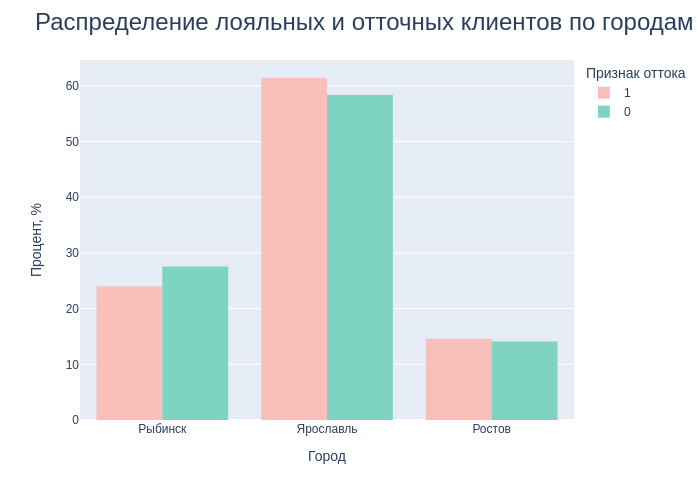

In [94]:
fig = px.histogram(
    data, 
    x='city', 
    color="churn", 
    barmode='group', 
    histnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение лояльных и отточных клиентов по городам', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Город',
    yaxis_title = 'Процент, %',
)

fig.show('png')

**Отточные и лояльные клиенты среди клиентов Ярославля, Ростова и Рыбинска:**

In [37]:
data.groupby(['city', 'churn']).agg({'user_id': 'count'}).reset_index().rename(
        columns = {'user_id': 'count_by_churn'})

,city,churn,count_by_churn
0,Ростов,0,1151
1,Ростов,1,265
2,Рыбинск,0,2246
3,Рыбинск,1,437
4,Ярославль,0,4758
5,Ярославль,1,1117


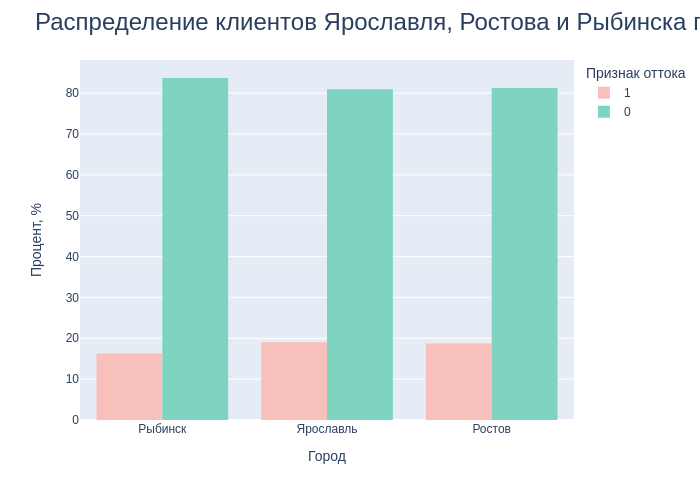

In [95]:
fig = px.histogram(
    data, 
    x='city', 
    color="churn", 
    barmode='group', 
    barnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение клиентов Ярославля, Ростова и Рыбинска по признаку оттока', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Город',
    yaxis_title = 'Процент, %',
)


fig.show('png')

- **Большинство всех клиентов - 5875 человек пользуются услугами банка в Ярославле.** Наименьшая часть клиентов в Ростове - всего 1416 клиентов.
- **Доля ушедших клиентов среди клиентов всех трех городов находится примерно на одном уровне 16-19%. Наибольшая доля ушедших клиентов наблюдается среди клиентов Ярославля - составляет 19%.**

##### Распределение клиентов по наличию кредитной карты (credit_card)

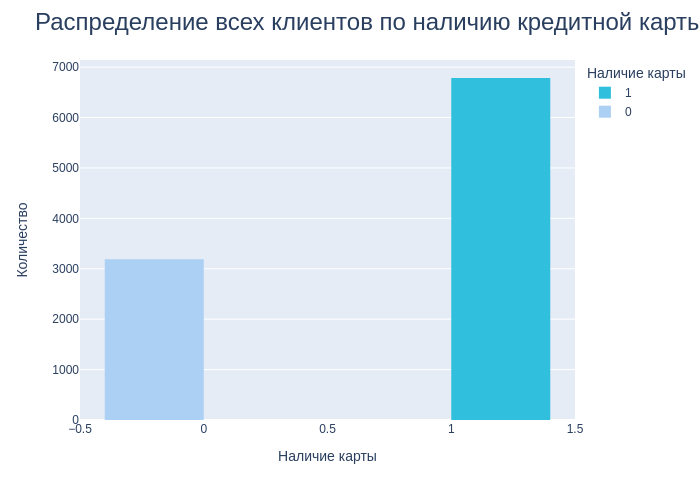

In [96]:
fig = px.histogram(
    data, 
    x='credit_card', 
    color="credit_card", 
    barmode='group', 
    color_discrete_sequence=['#ACD0F4', '#30BFDD'], 
    category_orders={"credit_card": ["Yes", "Not"]}
)

fig.update_layout(
    title='Распределение всех клиентов по наличию кредитной карты',
    title_font_size=24,
    xaxis_title = 'Наличие карты',
    yaxis_title = 'Количество',
    legend_title = 'Наличие карты',
    legend_traceorder="reversed"
)


fig.show('png')

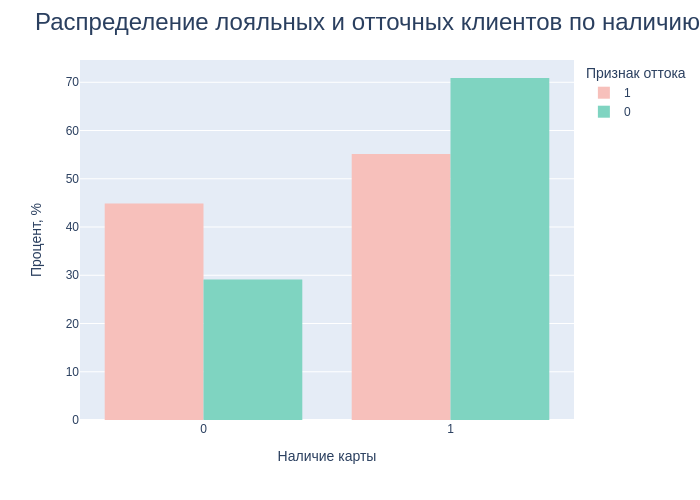

In [97]:
fig = px.histogram(
    data, 
    x='credit_card', 
    color="churn", 
    barmode='group', 
    histnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение лояльных и отточных клиентов по наличию кредитной картой, %', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Наличие карты',
    yaxis_title = 'Процент, %',
)

fig.show('png')

**Отточные и лояльные клиенты среди клиентов с картой и без:**

In [41]:
data.groupby(['credit_card', 'churn']).agg({'user_id': 'count'}).reset_index().rename(
        columns = {'user_id': 'count_by_churn'})

,credit_card,churn,count_by_churn
0,0,0,2374
1,0,1,816
2,1,0,5781
3,1,1,1003


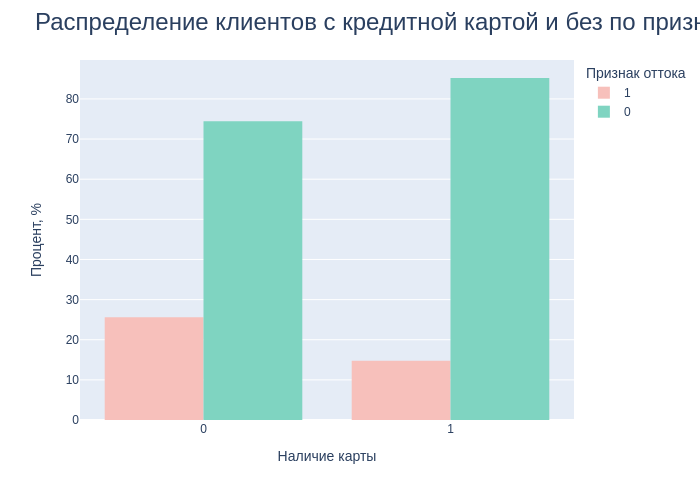

In [98]:
fig = px.histogram(
    data, 
    x='credit_card', 
    color="churn", 
    barmode='group', 
    barnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение клиентов с кредитной картой и без по признаку оттока, %', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Наличие карты',
    yaxis_title = 'Процент, %',
)

fig.show('png')

- **У большинства пользователей есть кредитная карта** - таких насчитывается 6784 клиентов. У 3190 клиентов кредитной карты нет.
- В разрезе оттока владельцы карт реже уходят. **У лояльных клиентов в 70.8% случаев есть кредитная карта.**
- **У клиентов без кредитной карты доля оттока на 10 процентных пунктов выше, чем у клиентов с картой и составляеет 25.5%.**

##### Распределение клиентов по активности (last_activity)

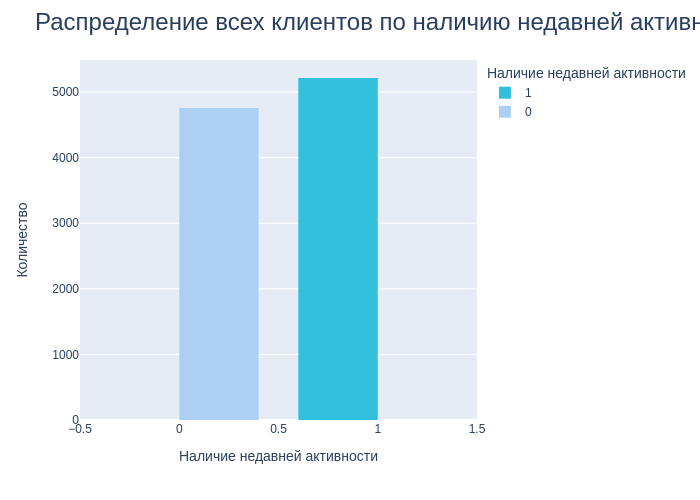

In [99]:
fig = px.histogram(
    data, 
    x='last_activity', 
    color="last_activity", 
    barmode='group', 
    color_discrete_sequence=['#30BFDD', '#ACD0F4'],
    category_orders={"last_activity": ["Yes", "Not"]}
)

fig.update_layout(
    title='Распределение всех клиентов по наличию недавней активности',
    title_font_size=24,
    xaxis_title = 'Наличие недавней активности',
    yaxis_title = 'Количество',
    legend_title = 'Наличие недавней активности',

   
    
)


fig.show('png')

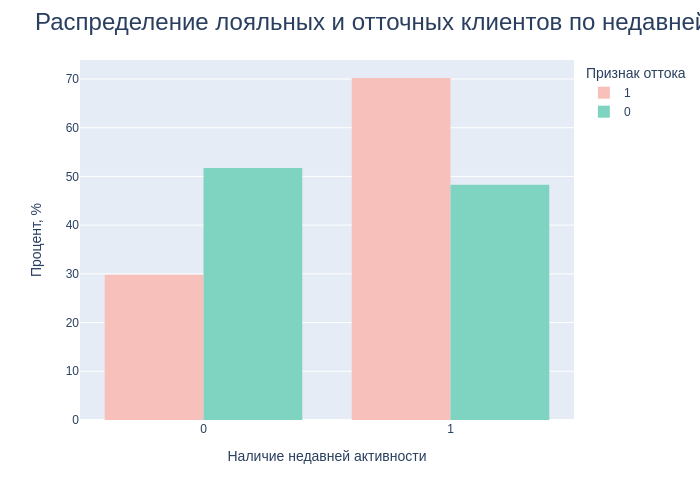

In [100]:
fig = px.histogram(
    data, 
    x='last_activity', 
    color='churn', 
    barmode='group', 
    histnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение лояльных и отточных клиентов по недавней активности, %', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Наличие недавней активности',
    yaxis_title = 'Процент, %'
)

fig.show('png')

**Отточные и лояльные клиенты среди клиентов с недавней активностью и без:**

In [45]:
data.groupby(['last_activity', 'churn']).agg({'user_id': 'count'}).reset_index().rename(
        columns = {'user_id': 'count_by_churn'})

,last_activity,churn,count_by_churn
0,0,0,4217
1,0,1,542
2,1,0,3938
3,1,1,1277


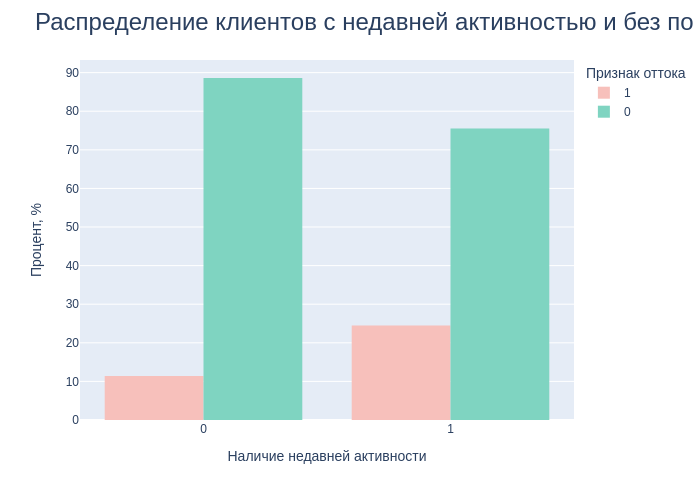

In [101]:
fig = px.histogram(
    data, 
    x='last_activity', 
    color='churn', 
    barmode='group', 
    barnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение клиентов с недавней активностью и без по признаку оттока', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Наличие недавней активности',
    yaxis_title = 'Процент, %'
)

fig.show('png')

- У 5215 клиентов была недавняя активность, у 4759 клиентов она отсутствует.
- **70% отточных клиентов были недавно активны.**
- **У клиентов с недавней активностью доля оттока на 13 процентных пунктов выше, чем у клиентов без недавней активности и составляет 24.4%.**

#### Распределение непрерывных признаков целого типа

##### Распределение клиентов по количеству потребляемых продуктов (product)

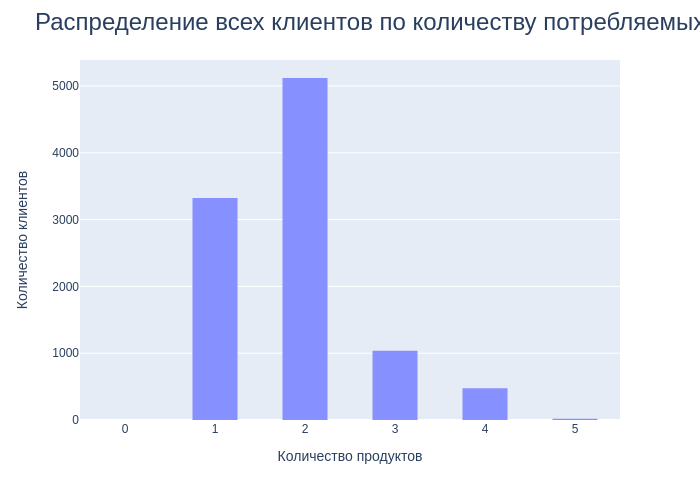

In [102]:
fig = px.histogram(data, 
                   x='products', 
                   color="products", 
                   
                   color_discrete_sequence=['#8690FF']
)

fig.update_layout(
    title='Распределение всех клиентов по количеству потребляемых продуктов',
    title_font_size=24,
    xaxis_title = 'Количество продуктов',
    yaxis_title = 'Количество клиентов',
    showlegend=False,  
    bargap=0.5
        
)


fig.show('png')

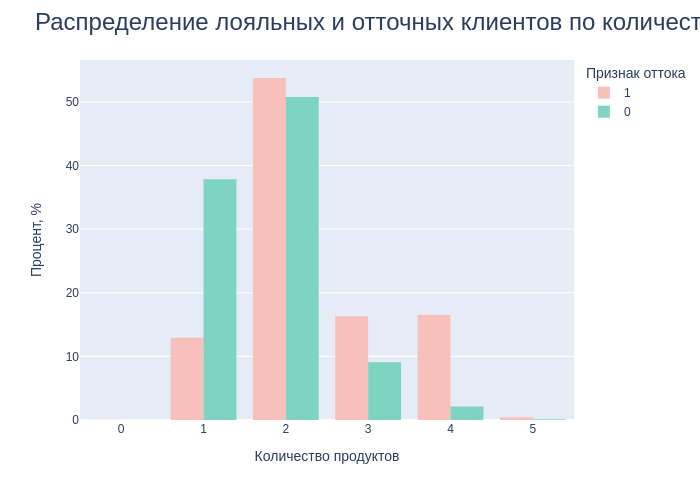

In [103]:
fig = px.histogram(
    data, 
    x='products', 
    color='churn', 
    barmode='group', 
    histnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение лояльных и отточных клиентов по количеству потребляемых продуктов, %', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Количество продуктов',
    yaxis_title = 'Процент, %'
)

fig.show('png')

**Отточные и лояльные клиенты среди клиентов с разным количеством используемых продуктов:**

In [49]:
data.groupby(['products', 'churn']).agg({'user_id': 'count'}).reset_index().rename(
        columns = {'user_id': 'count_by_churn'})

,products,churn,count_by_churn
0,0,1,1
1,1,0,3088
2,1,1,235
3,2,0,4141
4,2,1,978
5,3,0,741
6,3,1,297
7,4,0,174
8,4,1,300
9,5,0,11


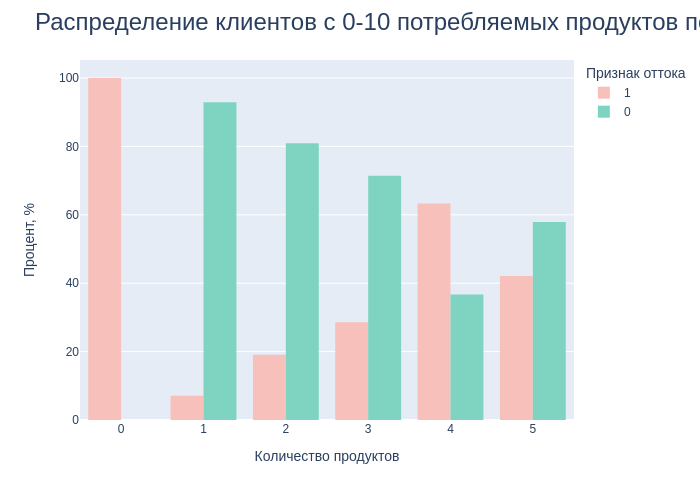

In [104]:
fig = px.histogram(
    data, 
    x='products', 
    color='churn', 
    barmode='group', 
    barnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение клиентов с 0-10 потребляемых продуктов по признаку оттока, %', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Количество продуктов',
    yaxis_title = 'Процент, %'
)

fig.show('png')

- Большинство клиентов потребляет **2 продукта (5119 клиентов) , либо 1 продукт (3323 клиента).**
- **Наибольший отток отмечается у клиентов, использующих 4 продукта, где он составляет 63.29%.**
- Наибольшая лояльность отмечается у клиентов, использующих 1 продукт. **Лояльных клиентов, пользующихся 1 продуктом, 92.9%.**

##### Распределение клиентов по количеству баллов собственности (equity)

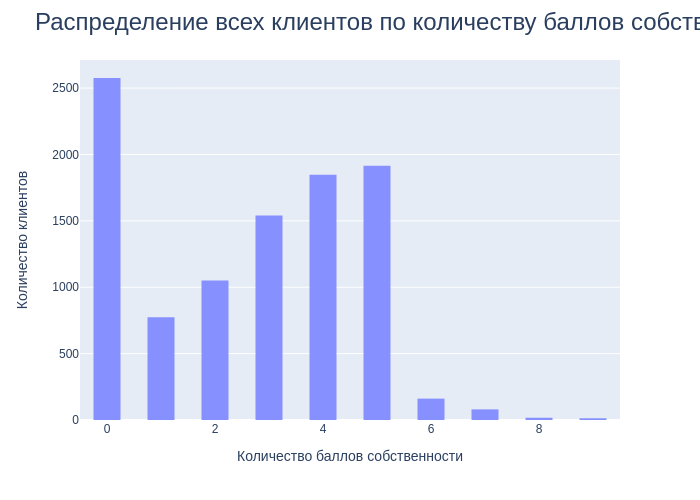

In [105]:
fig = px.histogram(data, 
                   x='equity', 
                   color="equity", 
                   color_discrete_sequence=['#8690FF']
)

fig.update_layout(
    title='Распределение всех клиентов по количеству баллов собственности',
    title_font_size=24,
    xaxis_title = 'Количество баллов собственности',
    yaxis_title = 'Количество клиентов',
    showlegend=False,  
    bargap=0.5
        
)


fig.show('png')

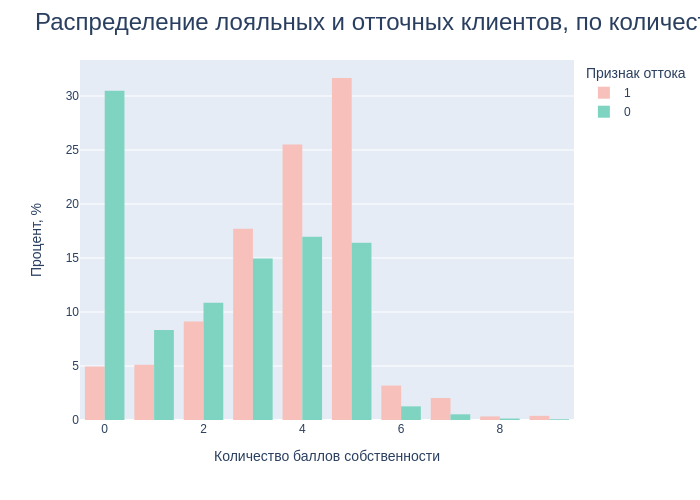

In [106]:
fig = px.histogram(
    data, 
    x='equity', 
    color='churn', 
    barmode='group', 
    histnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение лояльных и отточных клиентов, по количеству баллов собственности, %', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Количество баллов собственности',
    yaxis_title = 'Процент, %'
)

fig.show('png')

**Отточные и лояльные клиенты среди клиентов с разным количеством баллов собственности:**

In [53]:
data.groupby(['equity', 'churn']).agg({'user_id': 'count'}).reset_index().rename(
        columns = {'user_id': 'count_by_churn'}).head(10)

,equity,churn,count_by_churn
0,0,0,2486
1,0,1,90
2,1,0,680
3,1,1,93
4,2,0,885
5,2,1,166
6,3,0,1219
7,3,1,322
8,4,0,1383
9,4,1,464


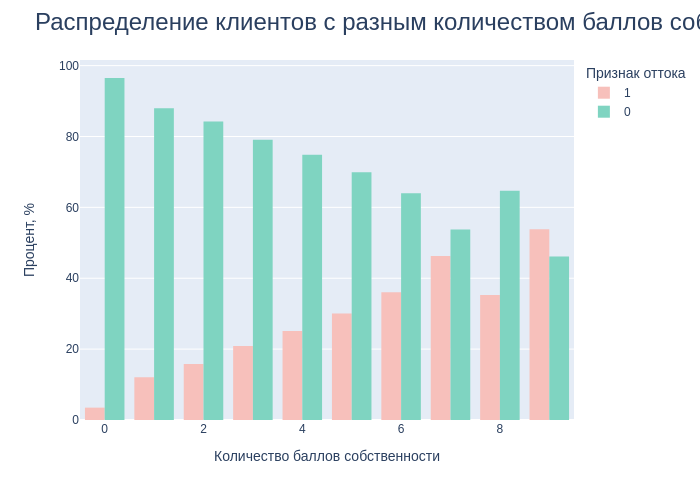

In [107]:
fig = px.histogram(
    data, 
    x='equity', 
    color='churn', 
    barmode='group', 
    barnorm = "percent", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение клиентов с разным количеством баллов собственности по признаку оттока, %', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Количество баллов собственности',
    yaxis_title = 'Процент, %'
)

fig.show('png')

- Большинство клиентов либо не имеют собственноcти, либо имеют 3-5 баллов собственности.
- С увеличением количества баллов собственности лояльность клиента падает. **Клиенты с 4 и более баллами собственности более склонны к оттоку.**
- **Наиболее лояльные - клиенты без собственности, отточность которых составляет всего 3.4%.**

#### Распределение непрерывных признаков вещественного типа

##### Распределение клиентов по возрасту (age)

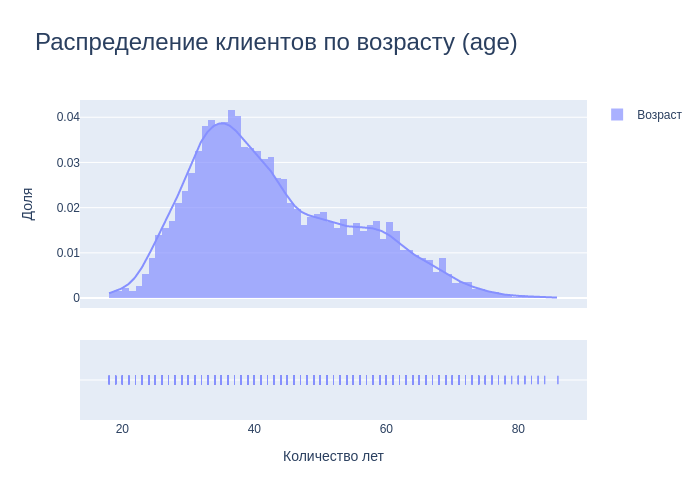

In [108]:
group_labels = ['Возраст']

colors = ['#8690FF']

fig = ff.create_distplot([data['age']], group_labels, colors = colors)

fig.update_layout(
    title='Распределение клиентов по возрасту (age)',
    xaxis_title = 'Количество лет',
    title_font_size=24,
    yaxis_title = 'Доля'
)

fig.show('png')

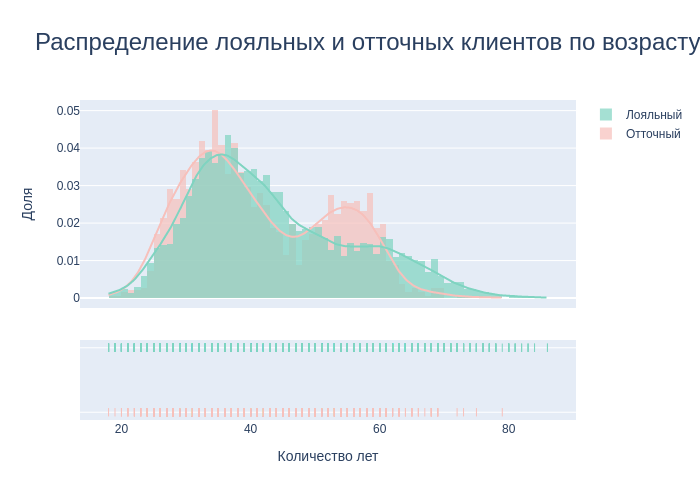

In [109]:
churn_data = data.query('churn == 1')

stay_data = data.query('churn == 0')

hist_data = [churn_data['age'], stay_data['age']]

colors = ["#F7C0BB", "#7FD4C1"]

group_labels = ['Отточный','Лояльный']

fig = ff.create_distplot(hist_data, group_labels, colors = colors)

fig.update_layout(
    title='Распределение лояльных и отточных клиентов по возрасту (age)',
    title_font_size=24,
    xaxis_title = 'Количество лет',
    yaxis_title = 'Доля'
)

fig.show('png')

- Чаще всего **клиентами банка являеются люди 30-45 лет.**
- **Люди 50-60 лет чаще всего являются отточными.**
- Люди 40-45 лет более склонны к лояльности.

##### Распределение клиентов по баллам кредитного скоринга (score)

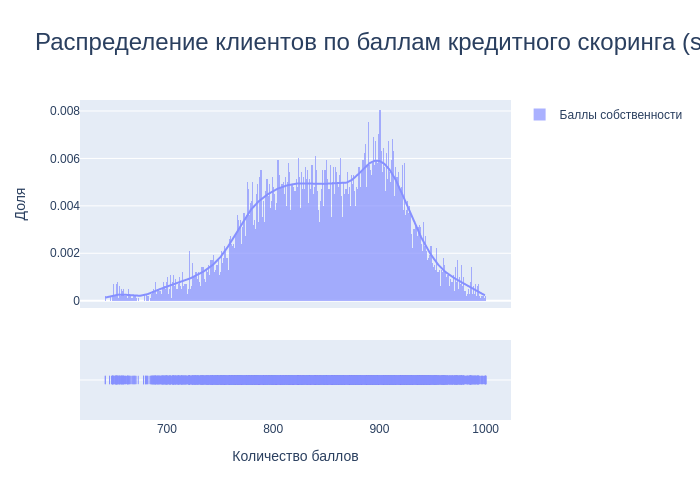

In [111]:
group_labels = ['Баллы собственности']

colors = ['#8690FF']

fig = ff.create_distplot([data['score']], group_labels, colors = colors)

fig.update_layout(
    title='Распределение клиентов по баллам кредитного скоринга (score)',
    title_font_size=24,
    xaxis_title = 'Количество баллов',
    yaxis_title = 'Доля'
)

fig.show('png')

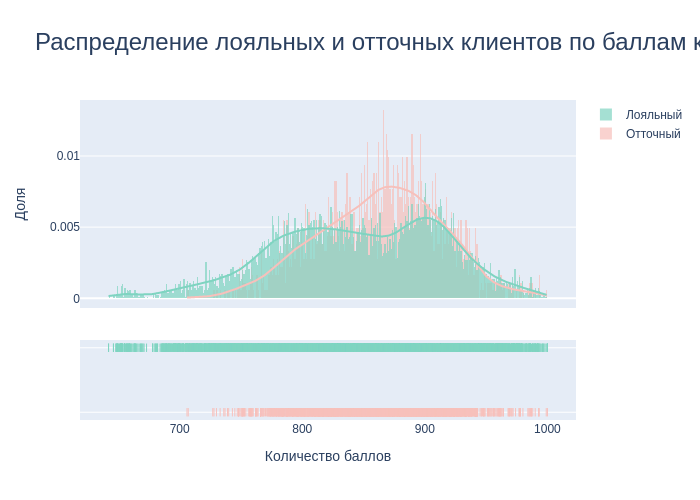

In [112]:
churn_data = data.query('churn == 1')

stay_data = data.query('churn == 0')

hist_data = [churn_data['score'], stay_data['score']]

colors = ["#F7C0BB", "#7FD4C1"]

group_labels = ['Отточный','Лояльный']

fig = ff.create_distplot(hist_data, group_labels, colors = colors)

fig.update_layout(
    title='Распределение лояльных и отточных клиентов по баллам кредитного скоринга (score)',
    title_font_size=24,
    xaxis_title = 'Количество баллов',
    yaxis_title = 'Доля'
)

fig.show('png')

- Основная масса клиентов имеет скоринг 800-900 баллов.
- **Наибольшая доля отточных клиентов среди клиентов со скорингом 830-900 баллов.**
- Клиентов со скорингом менее 800 баллов более лояльны.

##### Распределение клиентов по балансу (balance)

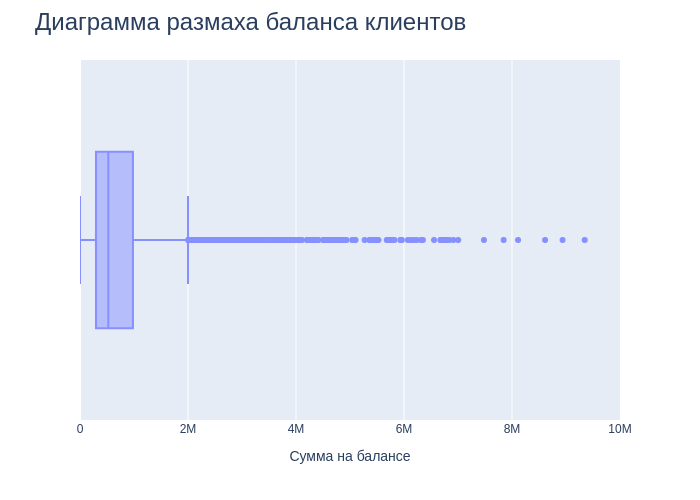

In [114]:
fig = px.box(data.query('balance.notna()'), x="balance", color_discrete_sequence=['#8690FF'])

fig.update_xaxes(range=[0, 10000000])

fig.update_layout(
    title='Диаграмма размаха баланса клиентов', 
    title_font_size=24,
    xaxis_title = 'Сумма на балансе'
)

fig.show('png')

- Верхняя граница сумм на балансе клиентов находится на уровне 2 миллионов.
- Нижняя граница на уровне 0.
- В датасете есть большое количество выбросов от 2 до 7 миллионов. 

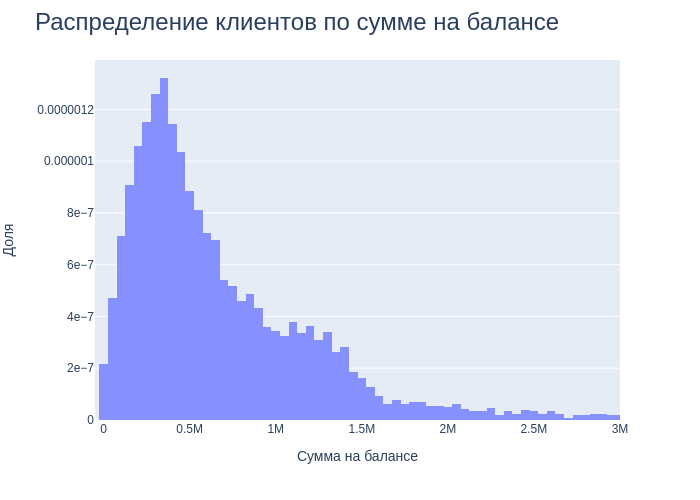

In [115]:
fig = px.histogram(
    data.query('balance.notna() & balance < 4000000'), 
    x='balance', 
    histnorm = "probability density", 
    color_discrete_sequence=['#8690FF']
)

fig.update_layout(
    title = 'Распределение клиентов по сумме на балансе', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Сумма на балансе',
    yaxis_title = 'Доля'
)

fig.update_xaxes(range=[-50000, 3000000])

fig.update_yaxes(tickformat=".8")

fig.show('png')


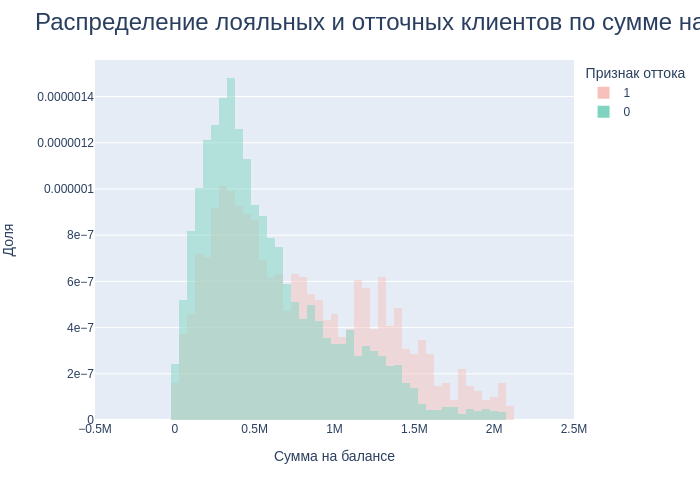

In [116]:
fig = px.histogram(
    data.query('balance.notna() & balance < 2100000'), 
    x='balance', 
    color='churn', 
    barmode= 'overlay', 
    histnorm = "probability density", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение лояльных и отточных клиентов по сумме на балансе', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Сумма на балансе',
    yaxis_title = 'Доля'
)

fig.update_xaxes(range=[-500000, 2500000])

fig.update_yaxes(tickformat=".8")

fig.show('png')

- Распределение сумм на  балансе клиентов смещено вправо с пиком на уровне 325-375 тысяч.
- Распределение сумм в разрезе отточости несильно отличается, **однако клиенты с суммами более 1.5 млн более склоны к оттоку.**

##### Распределение клиентов по оценочному доходу (est_salary)

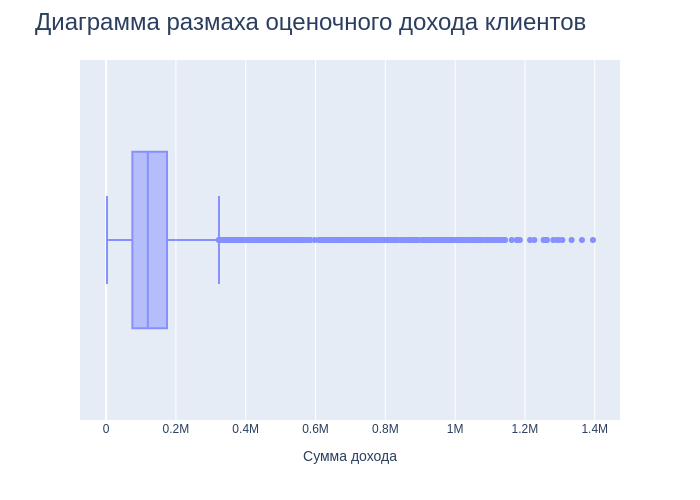

In [118]:
fig = px.box(
    data, 
    x="est_salary", 
    color_discrete_sequence=['#8690FF']
)

fig.update_layout(
    title='Диаграмма размаха оценочного дохода клиентов', 
    title_font_size=24,
    xaxis_title = 'Сумма дохода'
)

fig.show('png')

- Верхняя граница сумм на дохода клиентов находится на уровне 323 тысяч.
- Нижняя граница на уровне 2546.
- В датасете есть большое количество выбросов от 323 до 1.2 миллионов.

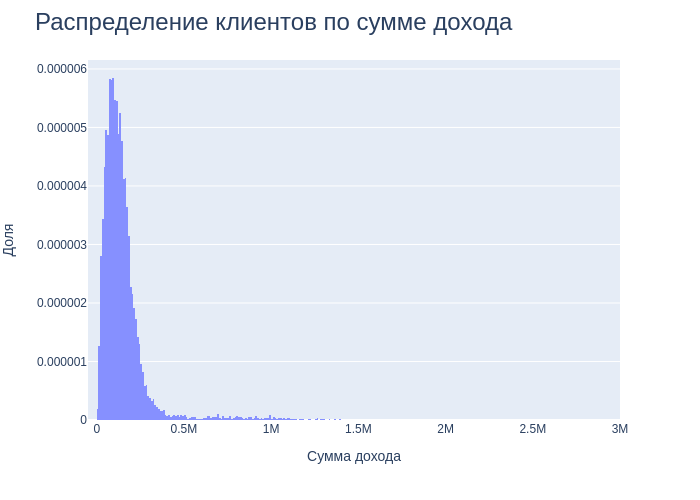

In [119]:
fig = px.histogram(
    data, 
    x='est_salary', 
    histnorm = "probability density", 
    color_discrete_sequence=['#8690FF']
)

fig.update_layout(
    title = 'Распределение клиентов по сумме дохода', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Сумма дохода',
    yaxis_title = 'Доля'
)

fig.update_xaxes(range=[-50000, 3000000])

fig.update_yaxes(tickformat=".8")

fig.show('png')

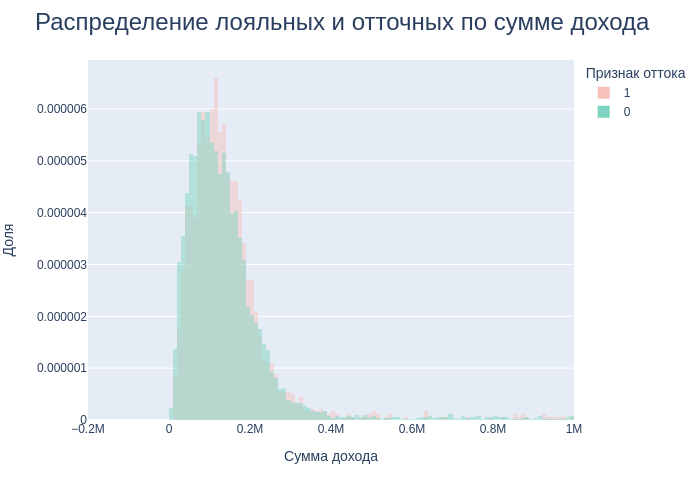

In [120]:
fig = px.histogram(
    data, 
    x='est_salary', 
    color='churn', 
    barmode= 'overlay', 
    histnorm = "probability density", 
    color_discrete_sequence=["#F7C0BB", "#7FD4C1"]
)

fig.update_layout(
    title = 'Распределение лояльных и отточных по сумме дохода', 
    title_font_size=24,
    legend_title = 'Признак оттока',
    xaxis_title = 'Сумма дохода',
    yaxis_title = 'Доля'
)

fig.update_xaxes(range=[-200000, 1000000])

fig.update_yaxes(tickformat=".6")

fig.show('png')

- Распределение доходов клиентов смещено вправо с пиком на уровне 70-80 тысяч.
- **Распределение доходов в разрезе отточости несильно отличается.**

### Типичные клиенты банка в разрезе отточности

1) Посмотрим на характеристики данных отточных клиентов:

In [73]:
round(data.query('churn == 1').describe(), 2)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_female,is_male,is_rybinsk,is_yaroslavl,is_rostov
count,1819.00,1819.00,1819.00,1819.00,1806.00,1819.00,1819.00,1819.00,1819.00,1819.0,1819.00,1819.00,1819.00,1819.00,1819.00
mean,170980.10,863.42,41.45,3.76,1134458.21,2.38,0.55,0.70,148289.70,1.0,0.35,0.65,0.24,0.61,0.15
std,35291.18,49.62,11.18,1.59,2034445.55,0.92,0.50,0.46,122932.16,0.0,0.48,0.48,0.43,0.49,0.35
min,94561.00,706.00,18.00,0.00,6.00,0.00,0.00,0.00,10880.27,1.0,0.00,0.00,0.00,0.00,0.00
25%,141304.00,828.00,32.00,3.00,387482.16,2.00,0.00,0.00,83196.61,1.0,0.00,0.00,0.00,0.00,0.00
50%,170532.00,866.00,39.00,4.00,783908.90,2.00,1.00,1.00,125395.22,1.0,0.00,1.00,0.00,1.00,0.00
75%,201399.50,898.00,52.00,5.00,1348127.55,3.00,1.00,1.00,175985.38,1.0,1.00,1.00,0.00,1.00,0.00
max,229058.00,1000.00,79.00,9.00,64866210.15,5.00,1.00,1.00,1263028.49,1.0,1.00,1.00,1.00,1.00,1.00


**Портрет отточного клиента:**
- Возраст варьируется от 18 до 79 лет. Средний возраст отточного клиента 41 год.
- Средний кредитный скоринг составляеет 863 балла c разбросом в 49 баллов.
- В среднем у клиента есть 4 объекта собственности.
- Медианное значение баланса клиента составляет 783908.
- В среднем клиент пользуется 2 продуктами банка.
- У 55% клиентов есть кредитная карта.
- 70% клиентов были недавно активны.
- Медианное значение зарплаты клиента составляет 125395.
- 65% клиентов - мужчины.
- 61% клиентов из Ярославля, 24% из Рыбинска и 15% из Ростова.

In [74]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data.query('churn == 0').describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_female,is_male,is_rybinsk,is_yaroslavl,is_rostov
count,8155.000,8155.000,8155.000,8155.000,5889.000,8155.000,8155.000,8155.000,8155.000,8155.000,8155.000,8155.000,8155.000,8155.000,8155.000
mean,171928.111,845.396,43.021,2.378,733031.630,1.759,0.709,0.483,147674.638,0.000,0.533,0.467,0.275,0.583,0.141
std,33328.979,67.993,12.375,1.971,1953952.483,0.713,0.454,0.500,142684.405,0.000,0.499,0.499,0.447,0.493,0.348
min,95384.000,642.000,18.000,0.000,0.000,1.000,0.000,0.000,2546.300,0.000,0.000,0.000,0.000,0.000,0.000
25%,143046.000,796.000,34.000,0.000,279654.700,1.000,0.000,0.000,73445.555,0.000,0.000,0.000,0.000,0.000,0.000
50%,173142.000,848.000,40.000,3.000,475410.090,2.000,1.000,0.000,118227.600,0.000,1.000,0.000,0.000,1.000,0.000
75%,201160.500,900.000,51.000,4.000,853826.360,2.000,1.000,1.000,173960.925,0.000,1.000,1.000,1.000,1.000,0.000
max,229145.000,1000.000,86.000,9.000,119113552.010,5.000,1.000,1.000,1395064.450,0.000,1.000,1.000,1.000,1.000,1.000


**Портрет лояльного клиента:**
- Возраст варьируется от 18 до 86 лет. Средний возраст лояльного клиента 43 год.
- Средний кредитный скоринг составляеет 845 балла c разбросом в 67 баллов.
- В среднем у клиента есть 2 объекта собственности.
- Медианное значение баланса клиента составляет 475410.
- В среднем клиент пользуется 2 продуктами банка.
- У 70% клиентов есть кредитная карта.
- 48% клиентов были недавно активны.
- Медианное значение зарплаты клиента составляет 118227.
- 53% клиентов - женщины.
- 58% клиентов из Ярославля, 28% из Рыбинска и 14% из Ростова.

### Корреляционный анализ

Построим матрицу корреляции и по шкале Чеддока определим тесноту связи между признаками:

- 0 – полное отсутствие связи;
- 0 – 0.3 – очень слабая;
- 0.3 – 0.5 – слабая;
- 0.5 – 0.7 – средняя;
- 0.7 – 0.9 – высокая;
- 0.9 – 1 – очень высокая.
- 1 – абсолютная взаимозависимость.

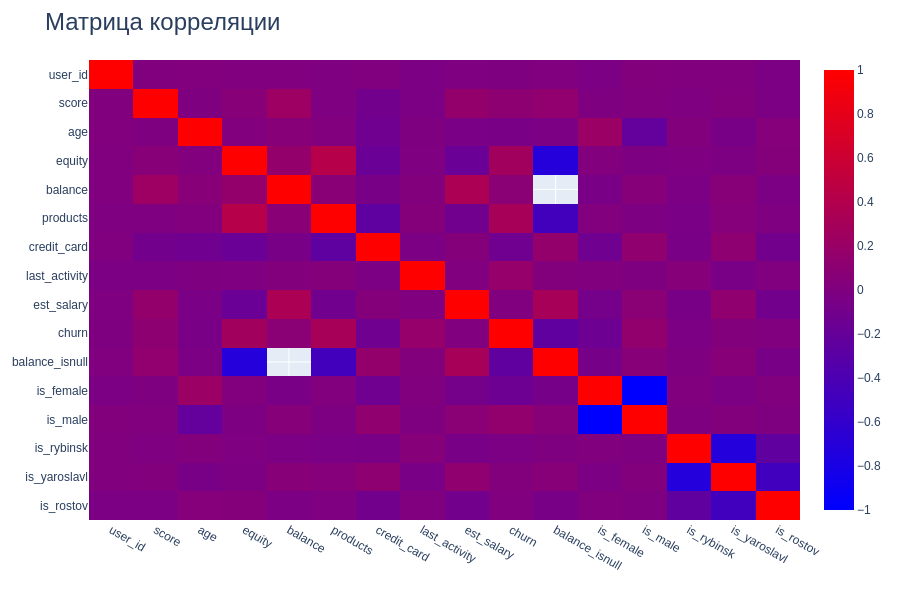

In [122]:
corr_matrix = data.corr()

fig = px.imshow(corr_matrix, 
    aspect='auto',
    width=900, 
    height=600,
    color_continuous_scale = 'Bluered')

fig.update_layout(
    title = 'Матрица корреляции', 
    title_font_size=24
)

fig.show('png')

Судя по матрице между признаком оттока и другими признаками наблюдается либо слабая связь и очень слабая связь, либо вовсе ее отсутствие.

**Слабая связь:**
- Отток и количество продуктов (products) - 0.30. Чем больше продуктов - тем выше вероятность оттока.

**Очень слабая связь:**
- Отток и объекты собственности - 0.27. Чем больше объектов собственности - тем выше вероятность оттока.
- Отток и недавняя активность - 0.16. Чем активнее клиент - тем выше вероятность оттока.

## Статистический анализ

### Проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Проверим имеющиеся данные о возрасте клиентов на нормальность, для чего используем **критерий Шапиро-Уилка.**

Поскольку выборка большая - в качестве **критического уровня статистической значимости alpha примем 0.01.**

**H0:** Распределение данных о возрасте клиентов нормально.\
**H1:** Распределение данных о возрасте клиентов нормально.

In [76]:
alpha = 0.01  # критический уровень статистической значимости

results = st.shapiro(data['age'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



**Вывод:**

Тип данных:
- количественный, непрерывный
- распределение: отличное от нормального, 
- количество групп: 2, 
- связанность групп: не связаны. 

**Для проверки гипотезы необходимо использовать критерий Манна-Уитни.**

**H0:** Различие возраста между клиентами, пользующимися двумя продуктами банка, и теми, которые пользуются одним продуктом статистически не значимо.\
**H1:** Различие возраста между клиентами, пользующимися двумя продуктами банка, и теми, которые пользуются одним продуктом статистически начимо.

In [77]:
age_one_product = data.query('products == 1')['age']

age_two_products  = data.query('products == 2')['age']

alpha = 0.01

results = st.mannwhitneyu(age_one_product, age_two_products)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.057138410813417605
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Полученное **p-значение 0.057** больше критического уровня значимости, что не дает нам отвергнуть нулевую гипотезу. Статистически значимого **различия в возрасте между клиентами, пользующимися одним продуктом и клиентами, которые полльзуются одним - нет.**

### Проверка гипотезы о равенстве средних значений объектов собственности отточных и лояльных клиентов

**Тип данных:**

- количественный, непрерывный целый
- распределение: отличное от нормального, 
- количество групп: 2, 
- связанность групп: не связаны.

Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности.

**Для проверки гипотезы о равентсве средних значений воспользуемся T-критерием Стьюдента.**

Поскольку имеющиеся выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, укажим equal_var=False при вызове метода scipy.stats.ttest_ind().

**H0:** Cредние значения объектов собственности отточных и лояльных клиентов равны.\
**H1:** Cредние значения объектов собственности отточных и лояльных клиентов статистически значимо различаются.

In [79]:
churn_equity = data.query('churn == 1')['equity']

stay_equity = data.query('churn == 0')['equity']


alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(churn_equity, stay_equity, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0104399828205813e-196
Отвергаем нулевую гипотезу


Полученное **p-значение** меньше критического уровня значимости, что заставляет нас отвергнуть нулевую гипотезу. **Cредние значения объектов собственности отточных и лояльных клиентов статистически значимо различаются.**

In [80]:
data.query('churn == 1')['equity'].mean()

3.7630566245189665

In [81]:
data.query('churn == 0')['equity'].mean()

2.378295524218271

## Промежуточные итоги для сегментации клиентов

**1) Выводы из исследовательского анализа данных:**


- В датафрейме представлены данные по клиентам, из которых 50% мужчин (4991 человек) и 50% женщин (4983 человек). **12% клиентов-женщин - отточные клиенты, в то время как доля отточных клиентов среди клиентов-мужчин - 24%. Доля отточных клиентов-мужчин в 2 раза выше, чем данный показатель у клиентов-женщин.**


- Большинство всех клиентов - 5875 человек пользуются услугами банка в Ярославле. **Доля ушедших клиентов среди клиентов всех трех городов находится примерно на одном уровне 16-19%. Наибольшая доля ушедших клиентов наблюдается среди клиентов Ярославля - составляет 19%.**


- У большинства пользователей есть кредитная карта - таких насчитывается 6784 клиентов. **В разрезе оттока владельцы карт реже уходят. У клиентов без кредитной карты доля оттока на 10 процентных пунктов выше, чем у клиентов с картой и составляеет 25.5%.**


- 70% отточных клиентов были недавно активны. **У клиентов с недавней активностью доля оттока на 13 процентных пунктов выше, чем у клиентов без недавней активности и составляет 24.4%.**


- Большинство клиентов потребляет **2 продукта (5119 клиентов) , либо 1 продукт (3323 клиента). Наибольший отток отмечается у клиентов, использующих 4 продукта, где он составляет 63.29%.** Наибольшая лояльность отмечается у клиентов, использующих 1 продукт. **Лояльных клиентов, пользующихся 1 продуктом, 92.9%.**


- С увеличением количества баллов собственности лояльность клиента падает. **Клиенты с 4 и более баллами собственности более склонны к оттоку.** Наиболее лояльные - клиенты без собственности, **отточность которых составляет всего 3.4%.**


- Чаще всего **клиентами банка являеются люди 30-45 лет. Люди 50-60 лет чаще всего являются отточными.**


- **Наибольшая доля отточных клиентов среди клиентов со скорингом 830-900 баллов.** Клиентов со скорингом менее 800 баллов более лояльны.


- Распределение сумм на балансе в разрезе отточости несильно отличается, **однако клиенты с суммами более 1.5 млн более склоны к оттоку.**


- **Распределение доходов в разрезе отточости несильно отличается.**


**2) Выводы из корреляционого анализа:**

Отток и количество продуктов (products) - 0.30. Чем больше продуктов - тем выше вероятность оттока.
Очень слабая связь:

Отток и объекты собственности - 0.27. Чем больше объектов собственности - тем выше вероятность оттока.
Отток и недавняя активность - 0.16. Чем активнее клиент - тем выше вероятность оттока.


**3) Выводы из статистического анализа:**

Cредние значения объектов собственности отточных и лояльных клиентов статистически значимо различаются.


**Итог:**

Принимая во внимание выводы, полученные из проведенного анализа можно выбрать следующие наиболее сильные признаки отточности клиентов:

- Клиент использует 3 и более продуктов
- У клиента более 4 объектов собственности
- У клиента нет кредитной карты 


## Сегментация клиентов

### Выделение сегментов

На основании выбранных ранее признаков отточности сформируем сегменты клиентов, где отточность будет превышать среднюю по банку.

Сначала найдем показатель средней отточности по всем данным:

In [82]:
print(
f"Доля отточных кллиентов по банку: {round(data['churn'].mean(), 2) * 100} %"
)

Доля отточных кллиентов по банку: 18.0 %


**Выделем 3 сегмента по следующим условиям:**
    
- У клиента более 4 объектов собственности и 3 и более продуктов в использовании;
- Клиент использует 3 и более продуктов и не имеет кредитной карты;
- У клиента клиента более 4 объектов собственности нет кредитной карты

In [83]:
segment_a = data.query('equity > 4 & products >= 3')
segment_b = data.query('products >= 3 & credit_card == 0')
segment_c = data.query('equity > 4 & credit_card == 0')

### Описательные характеристики сегментов

**1) Характеристика клиентов из сегмента A:**

In [84]:
segment_a.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_female,is_male,is_rybinsk,is_yaroslavl,is_rostov
count,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000
mean,174541.046,868.732,43.853,5.246,1360052.024,3.426,0.461,0.581,146357.160,0.487,0.414,0.586,0.167,0.726,0.107
std,36249.562,51.911,12.358,0.644,2112388.620,0.520,0.499,0.494,144940.456,0.500,0.493,0.493,0.374,0.446,0.309
min,95384.000,751.000,22.000,5.000,56925.470,3.000,0.000,0.000,8226.260,0.000,0.000,0.000,0.000,0.000,0.000
25%,145166.750,832.750,35.000,5.000,568860.358,3.000,0.000,0.000,70149.538,0.000,0.000,0.000,0.000,0.000,0.000
50%,177423.000,868.000,41.000,5.000,986723.995,3.000,0.000,1.000,113871.270,0.000,0.000,1.000,0.000,1.000,0.000
75%,207611.500,909.000,53.000,5.000,1524487.993,4.000,1.000,1.000,179361.155,1.000,1.000,1.000,0.000,1.000,0.000
max,229017.000,987.000,76.000,9.000,43277099.840,5.000,1.000,1.000,1363549.520,1.000,1.000,1.000,1.000,1.000,1.000


- Всего 544 клиента.
- Средний возраст 43 года.
- 58% - мужчины.
- 72% клиентов из Ярославля.
- Медианное значенние остатка на балансе 986723.
- Используют 3 продукта.
- Имеют 5 объектов в собственности.
- 54% не имеет кредитной карты.
- У 42% не было недавней активности.

**2) Характеристика клиентов из сегмента B:**

In [85]:
segment_b.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_female,is_male,is_rybinsk,is_yaroslavl,is_rostov
count,820.000,820.000,820.000,820.000,807.000,820.000,820.000,820.000,820.000,820.000,820.000,820.000,820.000,820.000,820.000
mean,171101.421,854.971,45.246,3.727,1097465.217,3.184,0.000,0.535,136447.817,0.323,0.594,0.406,0.124,0.801,0.074
std,34799.981,54.871,12.714,1.520,1793746.769,0.388,0.000,0.499,116014.060,0.468,0.491,0.491,0.330,0.399,0.263
min,96267.000,733.000,19.000,0.000,63.000,3.000,0.000,0.000,3487.330,0.000,0.000,0.000,0.000,0.000,0.000
25%,142355.750,814.000,35.000,3.000,414048.610,3.000,0.000,0.000,73879.368,0.000,0.000,0.000,0.000,1.000,0.000
50%,172814.000,853.000,42.000,4.000,741203.450,3.000,0.000,1.000,114771.280,0.000,1.000,0.000,0.000,1.000,0.000
75%,200841.500,896.000,55.250,5.000,1334303.755,3.000,0.000,1.000,166078.858,1.000,1.000,1.000,0.000,1.000,0.000
max,229058.000,993.000,83.000,9.000,43277099.840,4.000,0.000,1.000,1363549.520,1.000,1.000,1.000,1.000,1.000,1.000


- Всего 820 клиентов.
- Средний возраст 45 лет.
- 59% - женщины.
- 80% клиентов из Ярославля.
- Медианное значенние остатка на балансе 741203.
- Используют 3 продукта.
- Имеют 4 объекта в собственности.
- 100% не имеют кредитной карты.
- У 47% не было недавней активности.

**3) Характеристика клиентов из сегмента С:**

In [86]:
segment_c.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_female,is_male,is_rybinsk,is_yaroslavl,is_rostov
count,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000,901.000
mean,173078.061,872.471,44.479,5.198,1317859.842,2.380,0.000,0.574,146643.018,0.388,0.518,0.482,0.289,0.537,0.174
std,34534.606,48.387,12.409,0.597,2128851.316,0.662,0.000,0.495,131031.370,0.488,0.500,0.500,0.453,0.499,0.380
min,96404.000,724.000,22.000,5.000,61205.620,1.000,0.000,0.000,7571.800,0.000,0.000,0.000,0.000,0.000,0.000
25%,144563.000,841.000,34.000,5.000,595650.870,2.000,0.000,0.000,76756.500,0.000,0.000,0.000,0.000,0.000,0.000
50%,173973.000,877.000,42.000,5.000,931691.240,2.000,0.000,1.000,119521.460,0.000,1.000,0.000,0.000,1.000,0.000
75%,201817.000,907.000,55.000,5.000,1410343.460,3.000,0.000,1.000,177398.760,1.000,1.000,1.000,1.000,1.000,0.000
max,229017.000,1000.000,76.000,9.000,43277099.840,4.000,0.000,1.000,1363549.520,1.000,1.000,1.000,1.000,1.000,1.000


- Всего 901 клиент.
- Средний возраст 44 лет.
- 51% - женщины.
- 53% клиентов из Ярославля.
- Медианное значенние остатка на балансе 931691.
- Используют 2 продукта.
- Имеют 5 объектов в собственности.
- 100% не имеет кредитной карты.
- У 43% не было недавней активности.

### Расчет доли оттока

Сгруппируем данные по признаку оттока и сравним доли для каждого сегмента:

In [87]:
all_data = data.groupby(['churn']).agg({'city': 'count'}).reset_index().rename(columns = {'city': 'all_data'})

In [88]:
segmentation = segment_a.groupby(['churn']).agg({'city': 'count'}).reset_index().rename(
    columns = {'city': 'segment_a'}).merge(
    segment_b.groupby(['churn']).agg({'city': 'count'}).reset_index().rename(
        columns = {'city': 'segment_b'}), on = 'churn'
)

In [89]:
segmentation = segmentation.merge(
    segment_c.groupby(['churn']).agg({'city': 'count'}).reset_index().rename(
        columns = {'city': 'segment_c'}), on = 'churn'
)

In [90]:
segmentation

,churn,segment_a,segment_b,segment_c
0,0,279,555,551
1,1,265,265,350


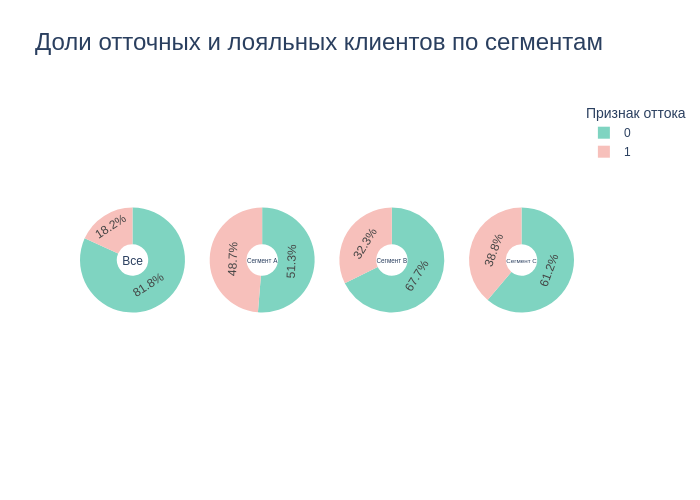

In [123]:
fig = make_subplots(rows=1, cols=4, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])


fig.add_trace(
    go.Pie(
        values=all_data['all_data'], 
        title = 'Все', 
        hole = 0.3, 
        marker_colors=["#7FD4C1", "#F7C0BB"]), row=1, col=1
)

fig.add_trace(
    go.Pie(
        values=segmentation['segment_a'], 
        title = 'Сегмент A', 
        hole = 0.3,), row=1, col=2
)

fig.add_trace(
    go.Pie(
        values=segmentation['segment_b'], 
        title = 'Сегмент B', 
        hole = 0.3,), row=1, col=3
)

fig.add_trace(
    go.Pie(
        values=segmentation['segment_c'], 
        title = 'Сегмент C', 
        hole = 0.3,), row=1, col=4
)

fig.update_layout(
    title='Доли отточных и лояльных клиентов по сегментам', 
    title_font_size=24,
    legend_title = 'Признак оттока'
)

fig.show('png')

- Все 3 выделенных сегмента значительно более склонны к оттоку, чем средний клиент банка.
- **Наибольшее значение оттока у сегмента A, где он составляет 48.7%**, что на 30% выше, чем в среднем по банку. Затем следует сегмент C, где доля оттока занимает 38.8%, и сегмент B c оттоком на уровне 32.3%.

## Общий вывод и рекомендации

**Результаты работы:**

- Изучена общая информация об имеющихся данных.
- Проведена проверка и подготовка данных.
- Проведен исследовательский анализ данных.
- Осуществлена постановка и проверка статистических гипотез.
- Составлены промежуточные итоги для сегментации клиентов.
- Проведена сегментация клиентов на основе выделенных показателей.
- Подготовлена презентация.

**Исследовательский анализ данных показал:**

- В датафрейме представлены данные по клиентам, из которых 50% мужчин (4991 человек) и 50% женщин (4983 человек). **12% клиентов-женщин - отточные клиенты, в то время как доля оттчных клиентов среди клиентов-мужчин - 24%. Доля отточных клиентов-мужчин в 2 раза выше, чем данный показатель у клиентов-женщин.**
- Большинство всех клиентов - 5875 человек пользуются услугами банка в Ярославле. **Доля ушедших клиентов среди клиентов всех трех городов находится примерно на одном уровне 16-19%. Наибольшая доля ушедших клиентов наблюдается среди клиентов Ярославля - составляет 19%.**
- У большинства пользователей есть кредитная карта - таких насчитывается 6784 клиентов. **В разрезе оттока владельцы карт реже уходят. У клиентов без кредитной карты доля оттока на 10 процентных пунктов выше, чем у клиентов с картой и составляеет 25.5%.**
- 70% отточных клиентов были недавно активны. **У клиентов с недавней активностью доля оттока на 13 процентных пунктов выше, чем у клиентов без недавней активности и составляет 24.4%.**
- Большинство клиентов потребляет **2 продукта (5119 клиентов) , либо 1 продукт (3323 клиента). Наибольший отток отмечается у клиентов, использующих 4 продукта, где он составляет 63.29%.** Наибольшая лояльность отмечается у клиентов, использующих 1 продукт. **Лояльных клиентов, пользующихся 1 продуктом, 92.9%.**
- С увеличением количества баллов собственности лояльность клиента падает. **Клиенты с 4 и более баллами собственности более склонны к оттоку.** Наиболее лояльные - клиенты без собственности, **отточность которых составляет всего 3.4%.**
- Чаще всего **клиентами банка являеются люди 30-45 лет. Люди 50-60 лет чаще всего являются отточными.**
- **Наибольшая доля отточных клиентов среди клиентов со скорингом 830-900 баллов.** Клиентов со скорингом менее 800 баллов более лояльны.
- Распределение **сумм на балансе** в разрезе отточости несильно отличается, **однако клиенты с суммами более 1.5 млн более склоны к оттоку.**
- **Распределение доходов в разрезе отточости несильно отличается.**

**Корреляционный анализ показал:**

- Слабая связь выявлена между оттоком и количеством продуктов (products) - 0.30. Чем больше продуктов - тем выше вероятность оттока.
- Очень слабая связь обнаружена между оттоком и объектами собственности - 0.27. Чем больше объектов собственности - тем выше вероятность оттока.
- Очень слабая связь также обнаружена между оттоком и недавней активностью - 0.16. Чем активнее клиент - тем выше вероятность оттока.

**Статитический анализ показал:**

- Cредние значения объектов собственности отточных и лояльных клиентов статистически значимо различаются.

**Результаты сегментации:**

В результате проведенного анализа клиенты были сегментированы на 3 наиболее склонных к оттоку сегмента на основе следующих условий:
- У клиента более 4 объектов собственности и 3 и более продуктов в использовании;
- Клиент использует 3 и более продуктов и не имеет кредитной карты;
- У клиента клиента более 4 объектов собственности нет кредитной карты

**В сегмент A входят:** 544 клиента, средний возраст 43 года, большинство - мужчины из Ярославля, в большинстве не имеют кредитной карты, медианное значенние остатка на балансе 986723, используют 3 продукта и имеют 5 объектов в собственности.

**В сегмент B входят:** 820 клиентов, средний возраст 45 лет, большинство - женщины из Ярославля, не имеют кредитной карты, медианное значенние остатка на балансе 741203, используют 3 продукта и имеют 4 объекта в собственности.

**В сегмент C входят:** 901 клиент, средний возраст 44 года, большинство - женщины из Ярославля, не имеют кредитной карты, медианное значенние остатка на балансе 931691, используют 2 продукта и имеют 5 объектов в собственности.

Все 3 выделенных сегмента значительно более склонны к оттоку, чем средний клиент банка. **Наибольшее значение оттока у сегмента A, где он составляет 48.7%**, что на 30 п.п выше, чем в среднем по банку. Затем следует сегмент C, где доля оттока занимает 38.8%, и сегмент B c оттоком на уровне 32.3%.

**Рекомендации для сегмента A:** 

Чтобы остановить отток клиентов, отделу маркетинга «Метанпромбанка», в первую очередь, стоит обратить внимание на потребности клиентов из сегмента A. Поскольку была выявлена связь между оттоком и количеством продуктов, стоит оценить действительно ли клиентам нужно так много продуктов, каковы условия обслуживания и удовлетворяют ли они все потребности клиента. Судя по медианному значению остатка на балансе клиентам могут быть интересны банковские вклады на выгодных условиях - это позволит удержать данных клиентов на большее время.

**Рекомендации для сегмента B:** 

Поскольку в данный сегмент входят женщины со средним доходом, у которых нет кредитной карты - возможно стоит попробовать повысить активность данных клиентов, предложив кредитные карты с кешбэком в виде бонусов за покупки.

**Рекомендации для сегмента C:** 

У сегментов данного сегмента более 4 объектов собственности и нет кредитной карты. Вероятно, клиент заинтересован в приобретении объектов недвижимости - можно предложить выгодные программы ипотечного кредитования.

## Презентация

**Ссылка на презентацию:**

https://disk.yandex.ru/i/O7F9OT1Lq5wdpA